# 🎓 **Taller 2.2: Análisis de Valores Faltantes - Dataset Remax**


## OBJETIVOS DEL TALLER:
* ✅Cuantificar y visualizar valores faltantes por columna y en porcentajes
* ✅ Analizar patrones de las columnas con datos faltantes
* ✅ Analizar el tipo de valor faltante (MCAR, MAR, MNAR)
* ✅ Aplicar técnicas de imputación
* ✅ Evaluar el impacto de las imputaciones

## 📝 INSTRUCCIONES PARA ENTREGA:

1. **GUARDA ESTE NOTEBOOK** en tu Google Drive siguiendo esta convencion para el nombre del archivo:  NombreApellidoTemaDataset.ipynb
2. **COMPLETA TODOS LOS TODOs** en las celdas siguientes
3. **EJECUTA TODAS LAS CELDAS** y verifica que funcionen

🎓 **RÚBRICA DE EVALUACIÓN:**
- ✅ Código completo y funcional (50%)
- ✅ Análisis correcto de estadísticas (30%)
- ✅ Visualizaciones adecuadas (10%)
- ✅ Reporte claro de hallazgos (10%)

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
# Configuración e importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Montar Google Drive
drive.mount('/content/drive')
CURSO = "AprendizajeAutomatico2025"
BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks"
RUTA_CURSO = os.path.join(BASE_FOLDER, CURSO)

# Crear directorio
os.makedirs(BASE_FOLDER, exist_ok=True)

Mounted at /content/drive


# 📁 **LECTURA DEL DATASET**

In [3]:
# Cargar dataset Titanic
def cargar_dataset():
    try:
      path = RUTA_CURSO + '/data/remax.dat'
      df = pd.read_csv(path, sep=';', index_col=0, engine='python')
      return df
    except:
        try:
            # Intentar cargar desde URL alternativa
            url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/02-PREPROCESAMIENTO/data/datos_propiedades_ecuador.dat"
            df = pd.read_csv(url, sep=';', index_col=0, engine='python')
            print("✅ Dataset cargado desde URL GitHub")
            return df
        except:
            print("❌ No se pudo cargar el dataset")
            return None

In [107]:
# Cargar dataset
df = cargar_dataset()

if df is not None:
    print(f"📊 Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
    print("🔍 Primeras filas:")
    display(df.head(15))
else:
    print("⚠️ No se pudo cargar el dataset. Revisa la ruta en Drive.")

✅ Dataset cargado desde URL GitHub
📊 Dataset cargado: 4555 filas, 71 columnas
🔍 Primeras filas:


,_id,estado,direccion,Aeropuerto,Aestrenar,Agua,Alarma,Alcantarillado,Amoblado,Ano Construcción,...,NoDorm,NoMetros,estadoTran,lat,lng,precio,price,tipoInv,tipoTran,titulo
0,700a3c679fc98a495a6598aad4fed54bd4370fdb---Usa...,Usada,Ñusta - Calle Lira Ñan - Causayllacta - Quitum...,0,0,0,0,1,0,2008,...,3,93,NaN,0.000000,0.000000,65000.0,"65,000",Departamento,De Venta,Ñusta - Calle Lira Ñan - Causayllacta - Qu...
1,fa0ab90a2960f49706bfd7eae09558b399b18ad8---Usa...,Usada,Condor Ñan - Conjunto Sol del Sur - Ruccullact...,0,0,0,0,0,0,2008,...,3,88,NaN,0.000000,0.000000,60000.0,"60,000",Departamento,De Venta,Condor Ñan - Conjunto Sol del Sur - Rucculla...
2,dc32d6017e02ba8c61cdaf3454aa9c21d2489463---Usa...,Usada,Av Pedro V Maldonado - Conjunto Portal de Chim...,0,0,1,0,1,1,2000,...,2,46,NaN,0.000730,-0.001073,47000.0,"47,000",Departamento,De Venta,Av Pedro V Maldonado - Conjunto Portal de Chi...
3,f43847d841c74c009079d9759d0f10a648423183---Usa...,Usada,"Cusubamba - Turubamba Bajo - Solanda, Ecuador",0,0,0,1,0,1,2012,...,7,432,NaN,-0.277858,-78.539948,215000.0,"215,000",Casa,De Venta,"Cusubamba - Turubamba Bajo - Solanda, Ecuador"
4,fe89e3b31b9f32bfd3cf142e4983eca6ecd95adb---Usa...,Usada,Rocafuerte - Edificio Casa Ponton - Centro His...,0,0,0,1,0,0,2010,...,3,71,NaN,0.000000,0.000000,59500.0,"59,500",Departamento,De Venta,Rocafuerte - Edificio Casa Ponton - Centro ...
5,024beca4c87e1b2dd58e966718954d7952cd4ed9------...,NaN,S/N Alangasi Real Audiencia y De los Ciruelos ...,1,0,1,1,1,0,1990,...,0,"8,840",NaN,-0.313997,-78.405060,355000.0,"355,000",Quinta,De Venta,S/N Alangasi Real Audiencia y De los Ciruelos...
6,b213c17257cb5c9c4dd48ed25505f040b39126e4------...,NaN,"Inés Gangotena - Inchalillo - Sangolqui, Ecuador",0,0,0,0,0,0,2020,...,0,"4,905",NaN,0.000000,0.000000,417000.0,"417,000",Terreno,De Venta,"Inés Gangotena - Inchalillo - Sangolqui, Ec..."
7,c2dd9ef79b6ed63638219db15132bfb73954aa69---Por...,Por Estrenar,Oe9F BOSSANO - BOSSANO OeF - Bellavista - Iñaq...,0,1,0,1,0,0,2016,...,2,108.84,NaN,-0.189380,-78.477337,155000.0,"155,000",Departamento,De Venta,Oe9F BOSSANO - BOSSANO OeF - Bellavista - ...
8,d2855ea0ca178c750d17192afbaf653d949fc82e------...,NaN,Bloque Manuel Cordova Galarza - Conjunto.2 Hem...,0,0,1,1,1,1,2000,...,3,72,NaN,-0.070200,-78.470099,55000.0,"55,000",Departamento,De Venta,Bloque Manuel Cordova Galarza - Conjunto.2 He...
9,1d0e9ad6c6c038f11f81d6876f83104c8aaa405f---Usa...,Usada,s/N s-19 - Urb.puente de Piedra Conocoto la Sa...,0,0,0,1,0,1,2013,...,4,383.64,NaN,-0.315255,-78.483753,260000.0,"260,000",Casa,De Venta,s/N s-19 - Urb.puente de Piedra Conocoto la S...


# 🎯 **EJERCICIO 1: ANÁLISIS GENERAL DE VALORES FALTANTES**

In [93]:
def analisis_valores_faltantes(df):
    analisis = {}
    # TODO 1.1: Calcular las columnas que tienen valores faltantes
    missing_summary =  df.isnull().sum() # ← COMPLETAR
    # TODO 1.2: Calcular el porcentaje de valores faltantes por columna
    missing_percent = missing_summary*100/len(df)  # ← COMPLETAR

    # TODO 1.3: Crear un dataframe solo con las columas y filas que tienen valores faltantes
    missing_info = pd.DataFrame(df[df.isnull().any(axis=1)])  # ← COMPLETAR
    missing_info = missing_info[missing_summary[missing_summary > 0].index]# ← COMPLETAR - FILTRAR solo columnas con valores faltantes
    return missing_info

In [94]:
# Ejecutar funciones
print("🔍 Ejecutando análisis de valores faltantes...")
dfValoresFaltantes = analisis_valores_faltantes(df)
dfValoresFaltantes

🔍 Ejecutando análisis de valores faltantes...


,estado,Area Construcción,Terreno,Total M²,estadoTran,tipoTran
0,Usada,93.0,93,93.0,NaN,De Venta
1,Usada,NaN,NaN,88.0,NaN,De Venta
2,Usada,NaN,46,46.0,NaN,De Venta
3,Usada,432.0,405,432.0,NaN,De Venta
4,Usada,71.0,71,71.0,NaN,De Venta
...,...,...,...,...,...,...
4550,NaN,NaN,"154,734",154734.0,NaN,De Venta
4551,NaN,NaN,NaN,918.0,NaN,De Venta
4552,NaN,NaN,"2,125",2125.0,NaN,De Venta
4553,NaN,NaN,"2,500",2500.0,NaN,De Venta


In [95]:
def grafico_distribucion_faltantes(df):
    # TODO : Graficar un mapa de calor de los Valores Faltantes
    sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False) # ← COMPLETAR
    plt.show()

🔍 DISTRIBUCION DE VALORES FALTANTES


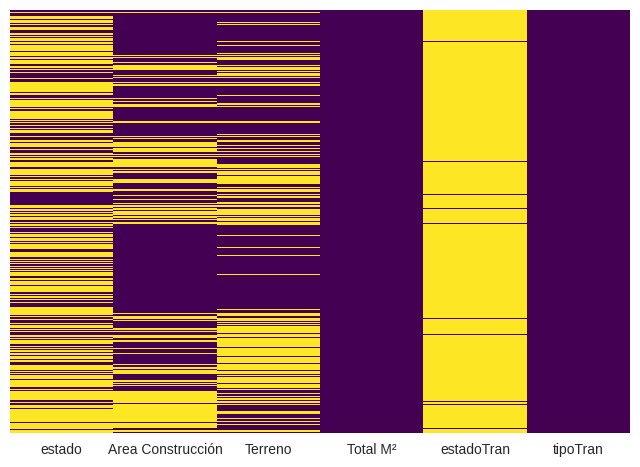

In [96]:
# Análisis para variables específicas
print("🔍 DISTRIBUCION DE VALORES FALTANTES")
grafico_distribucion_faltantes(dfValoresFaltantes)

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué columnas tienen el mayor porcentaje de valores faltantes?

Respuesta: La columna 'estadoTran'

¿Existe algún patrón visible en la matriz de valores faltantes? Describa el patrón.

Un patron visible es que terreno y estado Tran tienen valores faltantes en los mismos índices, de igual manera con terreno y estado.

¿Hay correlaciones entre los valores faltantes de diferentes columnas? Describa las correlaciones.

# 🔄 **EJERCICIO 2: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS NUMERICOS**

In [99]:
def analisis_multivariable(df):
    """
    Realiza análisis de relaciones entre variables numericas
    """
    print("🔍 INICIANDO ANÁLISIS MULTIVARIABLE")

    #Dado que la colmna estado es de tipo string, vamos a transformar a int.
    dfValoresFaltantes_matriz = dfValoresFaltantes.select_dtypes(include=[np.number])
    dfValoresFaltantes_matriz['estado_missing'] = df['estado'].isnull().astype(int)
    dfValoresFaltantes_matriz['tipoTran_missing'] = df['tipoTran'].isnull().astype(int)
    dfValoresFaltantes_matriz['terreno_missing'] = df['Terreno'].isnull().astype(int)
    dfValoresFaltantes_matriz['estadoTran_missing'] = df['estadoTran'].isnull().astype(int)
    # TODO 2.1: Matriz de correlación para variables numéricas
    print("1. MATRIZ DE CORRELACIÓN:")
    correlation_matrix = dfValoresFaltantes_matriz.corr()  # ← COMPLETAR
    print(correlation_matrix)

    # TODO 2.2: Visualizar matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1,vmax=1)# ← COMPLETAR
    plt.title('Matriz de Correlación - Variables Numéricas')
    plt.show()



🔍 INICIANDO ANÁLISIS MULTIVARIABLE
1. MATRIZ DE CORRELACIÓN:
                    Area Construcción  Total M²  estado_missing  \
Area Construcción            1.000000  0.148528        0.002228   
Total M²                     0.148528  1.000000        0.012646   
estado_missing               0.002228  0.012646        1.000000   
tipoTran_missing            -0.002165 -0.000392        0.004183   
terreno_missing             -0.019363  0.018843        0.066554   
estadoTran_missing          -0.012438  0.002652        0.193806   

                    tipoTran_missing  terreno_missing  estadoTran_missing  
Area Construcción          -0.002165        -0.019363           -0.012438  
Total M²                   -0.000392         0.018843            0.002652  
estado_missing              0.004183         0.066554            0.193806  
tipoTran_missing            1.000000         0.014888            0.004561  
terreno_missing             0.014888         1.000000           -0.118961  
estadoTran_mi

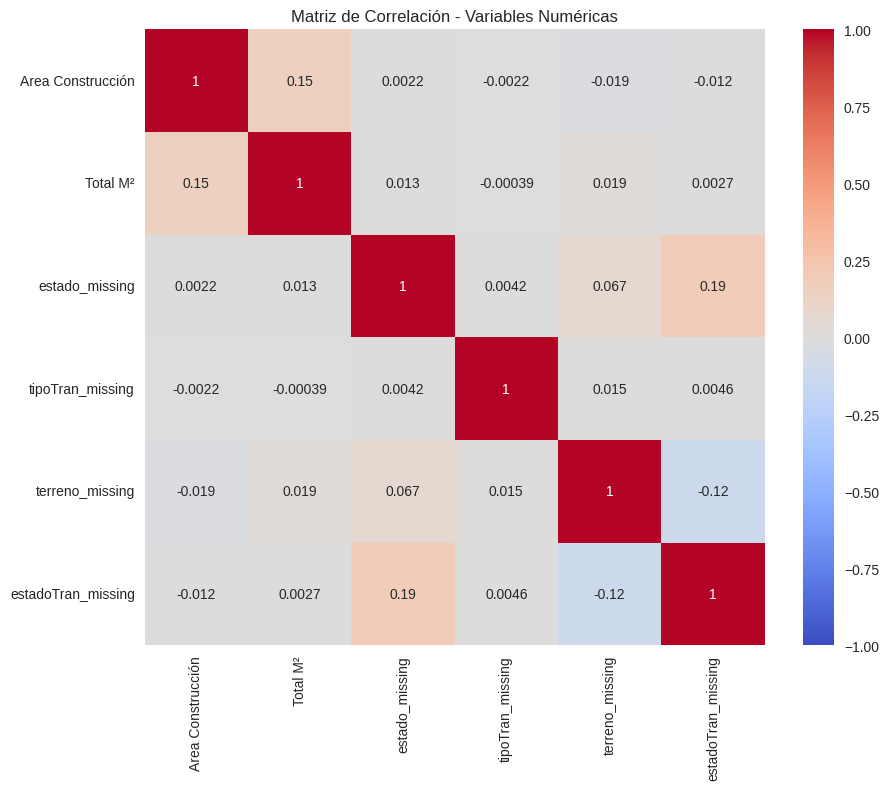

In [100]:
 # ← COMPLETAR Ejecutar análisis multivariable
analisis_multivariable(df)

### ✅ **RESULTADOS: REPORTE DE LOS TIPOS DE VALORES FALTANTES**
Clasifique los tipos de valores faltantes de acuero a las relaciones que identifico previamente

MAR: estado vs estadoTrain, terreno vs total

MCAR: Todas las demás, pues tienen valores extremadamente bajos

NMAR: Ninguna, pues no existen valores tan altos de correlación.

Preguntas para el Análisis:
¿Los valores faltantes son MCAR, MAR o MNAR?

Respuesta: Los valores faltates son MCAr y MAR, sin ningun NMAR.

¿Qué variables podrían predecir la presencia de valores faltantes?

Terreno podria predecir la falta de valores de TOtal o viceversa y estadoTran la de estado.

# 🔄 **EJERCICIO 3: IMPUTAR LOS VALORES FALTANTES**

In [106]:
# Aplique una tecnica adecuada para cada columna de valor faltante.

print("Impitació de valores faltantes")

for columna in dfValoresFaltantes.columns:
    # Definimos el nuevo valor que indica que el dato estaba ausente.
    valor_imputacion = f'{columna}_Faltante'

    # Aplicamos la imputación: reemplazamos NaN por la nueva etiqueta.
    # Using .loc to avoid FutureWarning on chained assignment
    df.loc[:, columna] = df[columna].fillna(valor_imputacion)

# --- 4. Verificación de la Imputación ---
print("DataFrame después de la imputación:")
print(df.head())
print("-" * 50)
print("Verificación de valores faltantes (deberían ser cero):")
# Corrected: check for nulls in the relevant columns using their names
print(df[dfValoresFaltantes.columns].isnull().sum())

Impitació de valores faltantes
DataFrame después de la imputación:
                                                 _id estado  \
0  700a3c679fc98a495a6598aad4fed54bd4370fdb---Usa...  Usada   
1  fa0ab90a2960f49706bfd7eae09558b399b18ad8---Usa...  Usada   
2  dc32d6017e02ba8c61cdaf3454aa9c21d2489463---Usa...  Usada   
3  f43847d841c74c009079d9759d0f10a648423183---Usa...  Usada   
4  fe89e3b31b9f32bfd3cf142e4983eca6ecd95adb---Usa...  Usada   

                                           direccion  Aeropuerto  Aestrenar  \
0  Ñusta - Calle Lira Ñan - Causayllacta - Quitum...           0          0   
1  Condor Ñan - Conjunto Sol del Sur - Ruccullact...           0          0   
2  Av Pedro V Maldonado - Conjunto Portal de Chim...           0          0   
3      Cusubamba - Turubamba Bajo - Solanda, Ecuador           0          0   
4  Rocafuerte - Edificio Casa Ponton - Centro His...           0          0   

   Agua  Alarma  Alcantarillado  Amoblado  Ano Construcción  ... NoDorm  \
0   

# 🔄 **EJERCICIO 4: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS CATEGORICOS**

In [109]:
# aplique el Chi-cuadrado (χ2) para determinar la relacion entre dos de los atributos categoricos
# Ejemplo: relación entre 'Aeropuerto' y 'Aestrenar'
tabla_contingencia = pd.crosstab(df['Aeropuerto'], df['Aestrenar'])
tabla_contingencia

Aestrenar,0,1
Aeropuerto,,
0,3453,828
1,201,73


In [123]:
!pip install spicy
import spicy.stats as stats
from stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Chi-cuadrado: {chi2}")
print(f"p-valor: {p}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperada:")
print(expected)

ModuleNotFoundError: No module named 'spicy.stats'

# 🔄 **EJERCICIO 5:IMPUTAR LOS VALORES FALTANTES DE ATRIBUTOS CATEGORICOS**

In [ ]:
# Aplique una tecnica adecuada para cada columna de valor faltante.

# ✅ **RESULTADOS:**
¿Qué columnas presentaron mayores desafíos para la imputación?

¿En qué casos consideraron que la eliminación era mejor que la imputación?

¿Cómo afecta el tipo de valor faltante (MCAR/MAR/MNAR) en la elección del método?

# 🚀 ¡TALLER FINALIZADO!"